In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
import sklearn.decomposition

%matplotlib inline

# Korrelationen

In [3]:
df = pd.DataFrame(np.random.randint(-100, 101, 1000).reshape(100, 10), columns=["g%g"%i for i in range(0,10)])
df.corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9
g0,1.000000,0.094327,0.044788,0.036929,-0.136647,0.062240,0.174399,-0.043713,-0.190313,-0.077793
g1,0.094327,1.000000,-0.081358,0.112318,-0.004941,0.022736,-0.003222,0.164367,0.070784,-0.124706
g2,0.044788,-0.081358,1.000000,0.118491,0.033673,0.099620,-0.006981,-0.153743,0.012176,-0.036233
g3,0.036929,0.112318,0.118491,1.000000,0.106491,-0.034260,0.059555,-0.034397,0.020875,-0.005560
g4,-0.136647,-0.004941,0.033673,0.106491,1.000000,0.030429,0.057701,-0.088287,0.079534,-0.150896
g5,0.062240,0.022736,0.099620,-0.034260,0.030429,1.000000,-0.032331,0.000064,-0.014159,0.160356
g6,0.174399,-0.003222,-0.006981,0.059555,0.057701,-0.032331,1.000000,0.030351,-0.129773,0.048265
g7,-0.043713,0.164367,-0.153743,-0.034397,-0.088287,0.000064,0.030351,1.000000,-0.008168,0.022972
g8,-0.190313,0.070784,0.012176,0.020875,0.079534,-0.014159,-0.129773,-0.008168,1.000000,-0.198750
g9,-0.077793,-0.124706,-0.036233,-0.005560,-0.150896,0.160356,0.048265,0.022972,-0.198750,1.000000


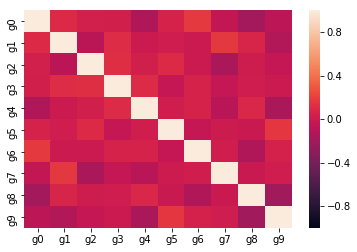

In [4]:
sns.heatmap(df.corr(), vmin=-1, vmax=1)

# Kurs

In [5]:
df1 = pd.DataFrame(np.random.randint(0, 100, 36).reshape(6, 6), columns=["c%g"%i for i in range(0, 6)])
df2 = pd.DataFrame(np.random.randint(0, 100, 25).reshape(5, 5), columns=["c%g"%i for i in range(0, 5)])
df3 = pd.DataFrame(np.random.randint(0, 100, 49).reshape(7, 7), columns=["c%g"%i for i in range(0, 7)])
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df

,c0,c1,c2,c3,c4,c5,c6
0,55,24,85,13,77,79.0,NaN
1,6,55,99,82,39,80.0,NaN
2,54,78,98,94,24,76.0,NaN
3,12,65,4,12,52,36.0,NaN
4,10,44,45,54,72,81.0,NaN
5,58,1,48,39,10,47.0,NaN
6,62,57,63,28,12,NaN,NaN
7,61,77,13,67,88,NaN,NaN
8,78,47,7,77,9,NaN,NaN
9,81,61,0,81,4,NaN,NaN


In [6]:
df.fillna(method="ffill")
df

,c0,c1,c2,c3,c4,c5,c6
0,55,24,85,13,77,79.0,NaN
1,6,55,99,82,39,80.0,NaN
2,54,78,98,94,24,76.0,NaN
3,12,65,4,12,52,36.0,NaN
4,10,44,45,54,72,81.0,NaN
5,58,1,48,39,10,47.0,NaN
6,62,57,63,28,12,NaN,NaN
7,61,77,13,67,88,NaN,NaN
8,78,47,7,77,9,NaN,NaN
9,81,61,0,81,4,NaN,NaN


In [7]:
df = df.dropna(axis=1)
df

,c0,c1,c2,c3,c4
0,55,24,85,13,77
1,6,55,99,82,39
2,54,78,98,94,24
3,12,65,4,12,52
4,10,44,45,54,72
5,58,1,48,39,10
6,62,57,63,28,12
7,61,77,13,67,88
8,78,47,7,77,9
9,81,61,0,81,4


Neue Spalte hinzufügen

In [8]:
df = pd.DataFrame.join(df, pd.Series(np.random.choice(["Typ A", "Typ B", "Typ C"], df.shape[0]), name="type"))
df

,c0,c1,c2,c3,c4,type
0,55,24,85,13,77,Typ C
1,6,55,99,82,39,Typ B
2,54,78,98,94,24,Typ B
3,12,65,4,12,52,Typ C
4,10,44,45,54,72,Typ A
5,58,1,48,39,10,Typ C
6,62,57,63,28,12,Typ A
7,61,77,13,67,88,Typ C
8,78,47,7,77,9,Typ C
9,81,61,0,81,4,Typ A


In [9]:
df.groupby(["type"]).describe()

c0                                                         c1  \
      count       mean        std   min   25%   50%    75%   max count   
type                                                                     
Typ A   5.0  42.800000  32.828341   7.0  10.0  54.0  62.00  81.0   5.0   
Typ B   4.0  27.750000  21.234798   6.0  13.5  25.5  39.75  54.0   4.0   
Typ C   9.0  53.333333  28.390139  12.0  33.0  58.0  76.00  93.0   9.0   

                  ...     c3          c4                                     \
            mean  ...    75%   max count       mean        std   min    25%   
type              ...                                                         
Typ A  62.000000  ...   54.0  81.0   5.0  34.000000  39.648455   0.0   4.00   
Typ B  66.500000  ...   85.0  94.0   4.0  41.000000  25.729361  23.0  23.75   
Typ C  41.666667  ...   77.0  95.0   9.0  58.222222  29.798397   9.0  52.00   

                          
        50%    75%   max  
type                      
Typ A  12.0  72.00  82.0  
Typ B  31.5  48.75  78.0  
Typ C  65.0  77.00  88.0  

[3 rows x 40 columns]

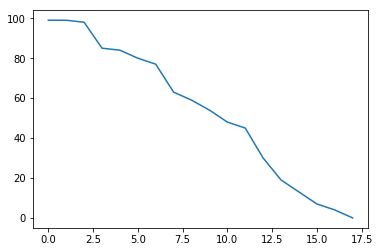

In [10]:
plt.plot(df["c2"].sort_values(ascending=False).values)

**Just a circle**

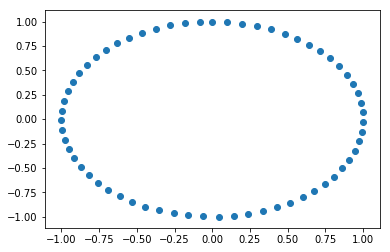

In [11]:
v = np.arange(0, 2*np.pi, 0.1, dtype=float)
asd = pd.DataFrame({"sin": np.sin(v), "cos":np.cos(v)}, index=v)
plt.scatter(x=asd["sin"], y=asd["cos"])

**Und weiter**

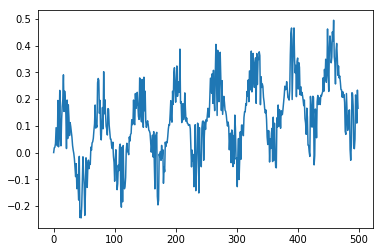

In [12]:
def asd(n):
    r = np.arange(0, n, 0.1)
    for i, v in enumerate(r):
        yield np.sin(v) * 0.3 * np.random.rand() + i/len(r)*0.25

v = list(asd(50))
plt.plot(v)

Text(0.5,1,'Seaborn distplot')

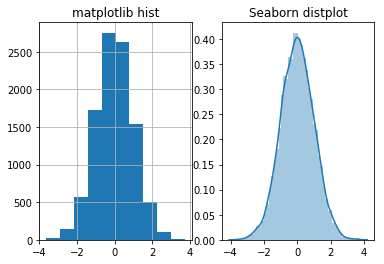

In [13]:
plt.subplot(1, 2, 1)
humpert = pd.Series(np.random.normal(size=10000))
humpert.hist(bins=10).set_title("matplotlib hist")
plt.subplot(1, 2, 2)
sns.distplot(humpert).set_title("Seaborn distplot")

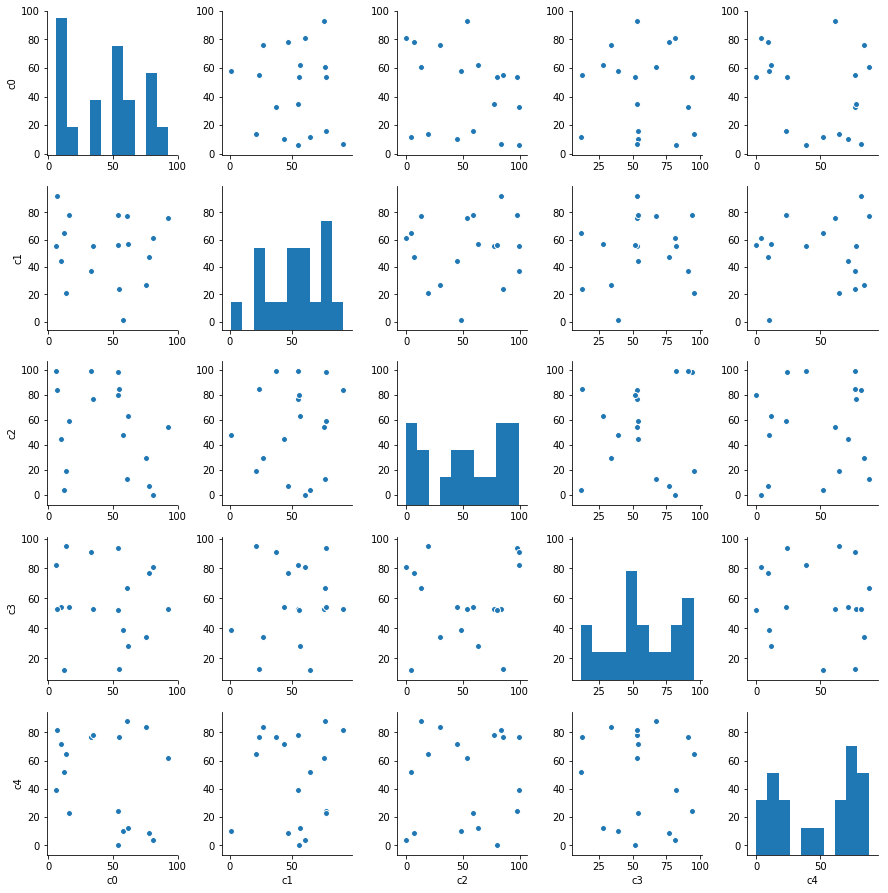

In [14]:
sns.pairplot(df)

# Arithmetic on numpy arrays

In [15]:
np.array([1, 2, 3, 4]) / np.array([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]])

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.5       ,  0.66666667,  0.75      ,  0.8       ],
       [ 0.33333333,  0.5       ,  0.6       ,  0.66666667]])

# PCA
\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

In [28]:
iris = sk.datasets.load_iris()

pca variance %: [ 0.92461621  0.05301557  0.01718514  0.00518309]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PCA 0,0.361590,-0.082269,0.856572,0.358844
PCA 1,0.656540,0.729712,-0.175767,-0.074706
PCA 2,-0.580997,0.596418,0.072524,0.549061
PCA 3,0.317255,-0.324094,-0.479719,0.751121


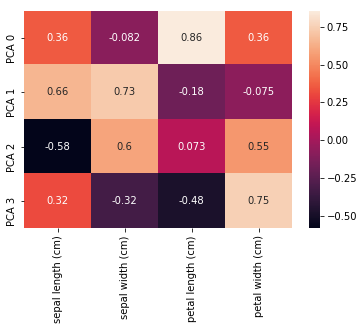

In [63]:
pca = sk.decomposition.PCA()
pca.fit_transform(iris.data)
print("pca variance %:", pca.explained_variance_ratio_)
comps = pd.DataFrame(pca.components_, columns=iris.feature_names, index=[f"PCA {x}" for x in range(len(iris.feature_names))])
display(comps)
sns.heatmap(comps, annot=True)

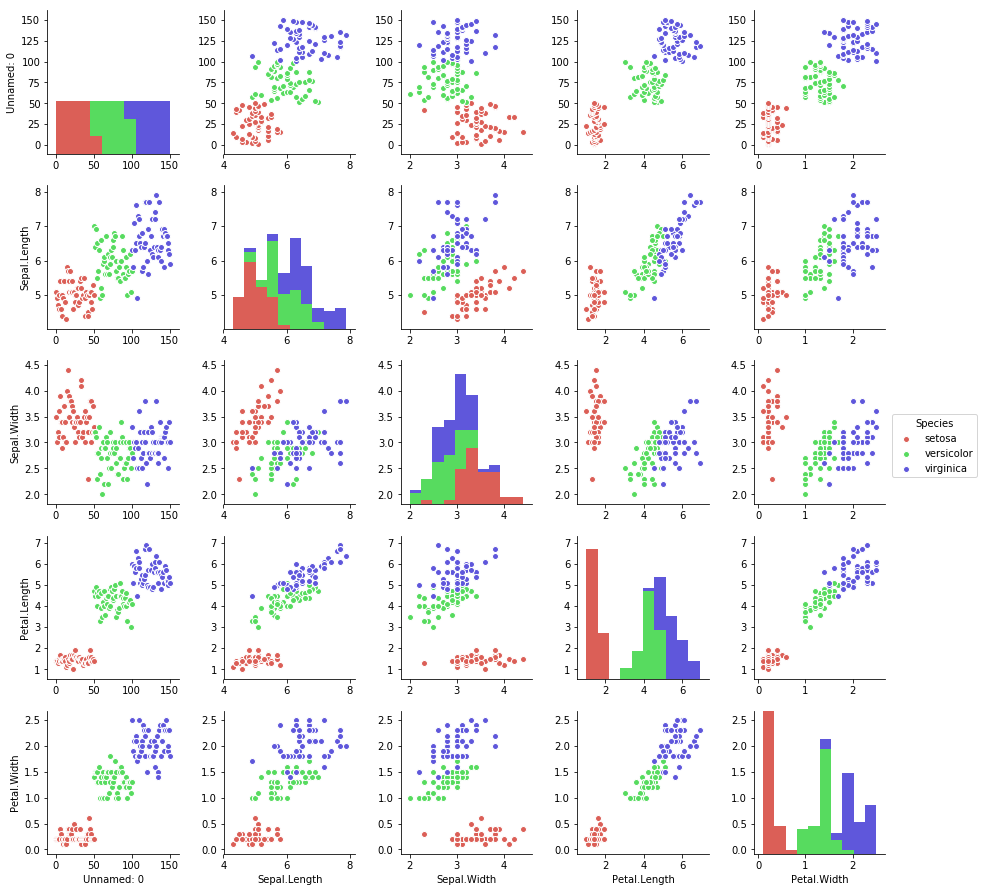

In [70]:
df = pd.read_csv("iris.csv")
sns.pairplot(df, hue='Species', palette='hls')